In [1]:
import pandas as pd

DATA = '/kaggle/input/gini-coefficient-after-tax/gini-coefficient (1).csv'
df = pd.read_csv(filepath_or_buffer=DATA)
df.head()

,Country,Year,Gini coefficient
0,Albania,1996,0.270103
1,Albania,2002,0.317390
2,Albania,2005,0.305957
3,Albania,2008,0.299847
4,Albania,2012,0.289605


How much data do we have?

In [2]:
len(df), df['Year'].nunique(), df['Country'].nunique(), len(df)/(df['Year'].nunique() * df['Country'].nunique())

(2705, 62, 195, 0.22373862696443342)

We have 2705 total rows, representing 195 countries over 62 years. Our dataset is only about 22 pct full.

Let's plot all of our data in the only way we sensibly can: as a year x Gini scatterplot, colored according to the country. Because we have nearly 200 entities, a legend is out of the question. And it's hard to tell 200 colors apart, so none of our lines are going to stand out. Ideally we would plot this data using some sort of density plot.

<Axes: xlabel='Year', ylabel='Gini coefficient'>

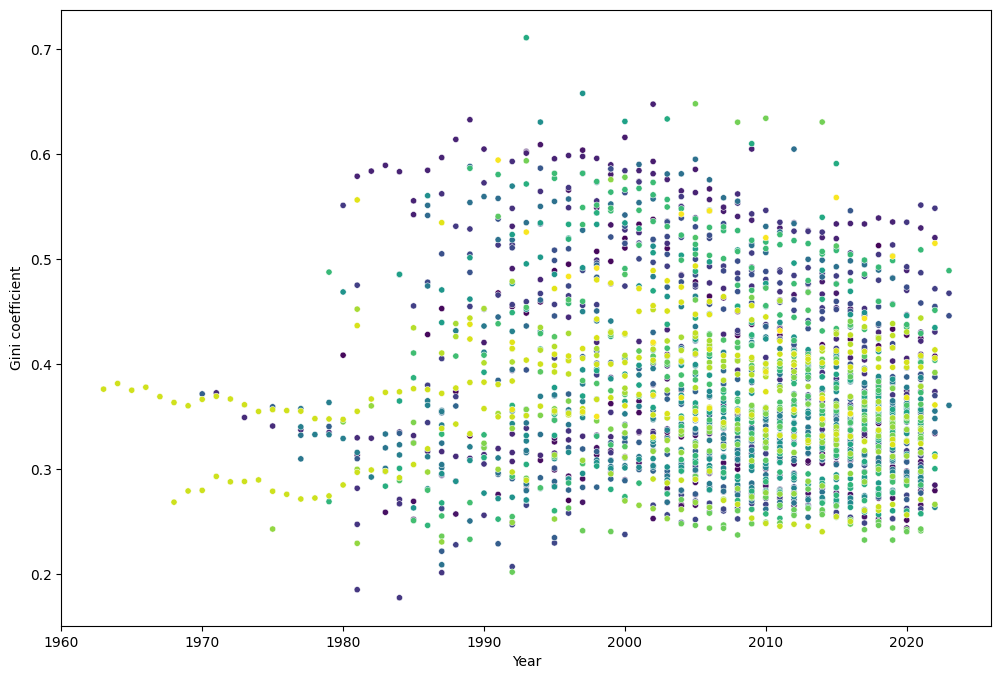

In [3]:
import matplotlib.pyplot as plt

from seaborn import scatterplot
from warnings import filterwarnings

filterwarnings(action='ignore', category=FutureWarning)

plt.figure(figsize=(12, 8))
scatterplot(palette='viridis', s=20, data=df, x='Year', y='Gini coefficient', hue='Country', legend=False, )

<Axes: xlabel='Year', ylabel='Gini coefficient'>

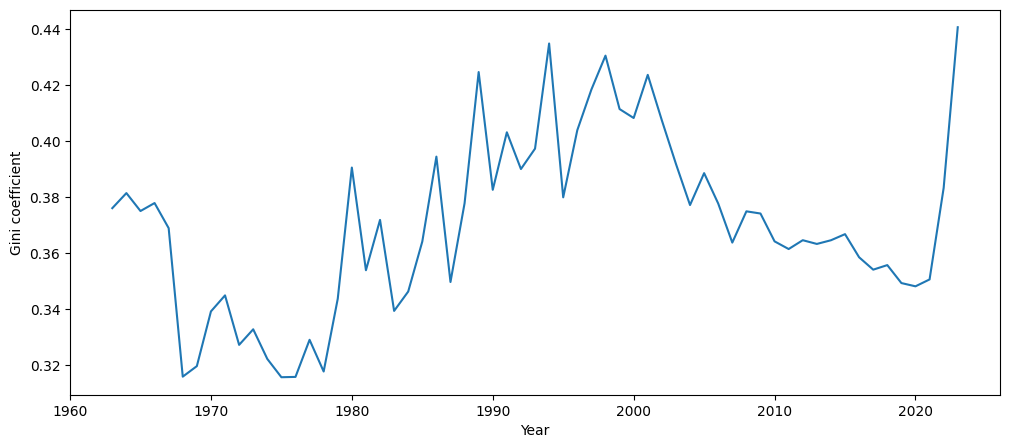

In [4]:
from seaborn import lineplot

plt.figure(figsize=(12, 5))
lineplot(data=df[df['Year'] < 2024][['Year', 'Gini coefficient']].groupby(by='Year').mean().reset_index(), x='Year', y='Gini coefficient')